## QUANTITATIVE FINANCE PART 1

#### INCOME STATEMENT

#### IMPORTING LIBRARIES

In [1]:
import googlefinance
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import speech_recognition as sr
from bs4 import BeautifulSoup
import fundamentalanalysis as fa
from matplotlib import ticker
import numpy_financial as npf
import yfinance as yf
import warnings 

### DESIGNING MODEL FOR INCOME STATEMENT 

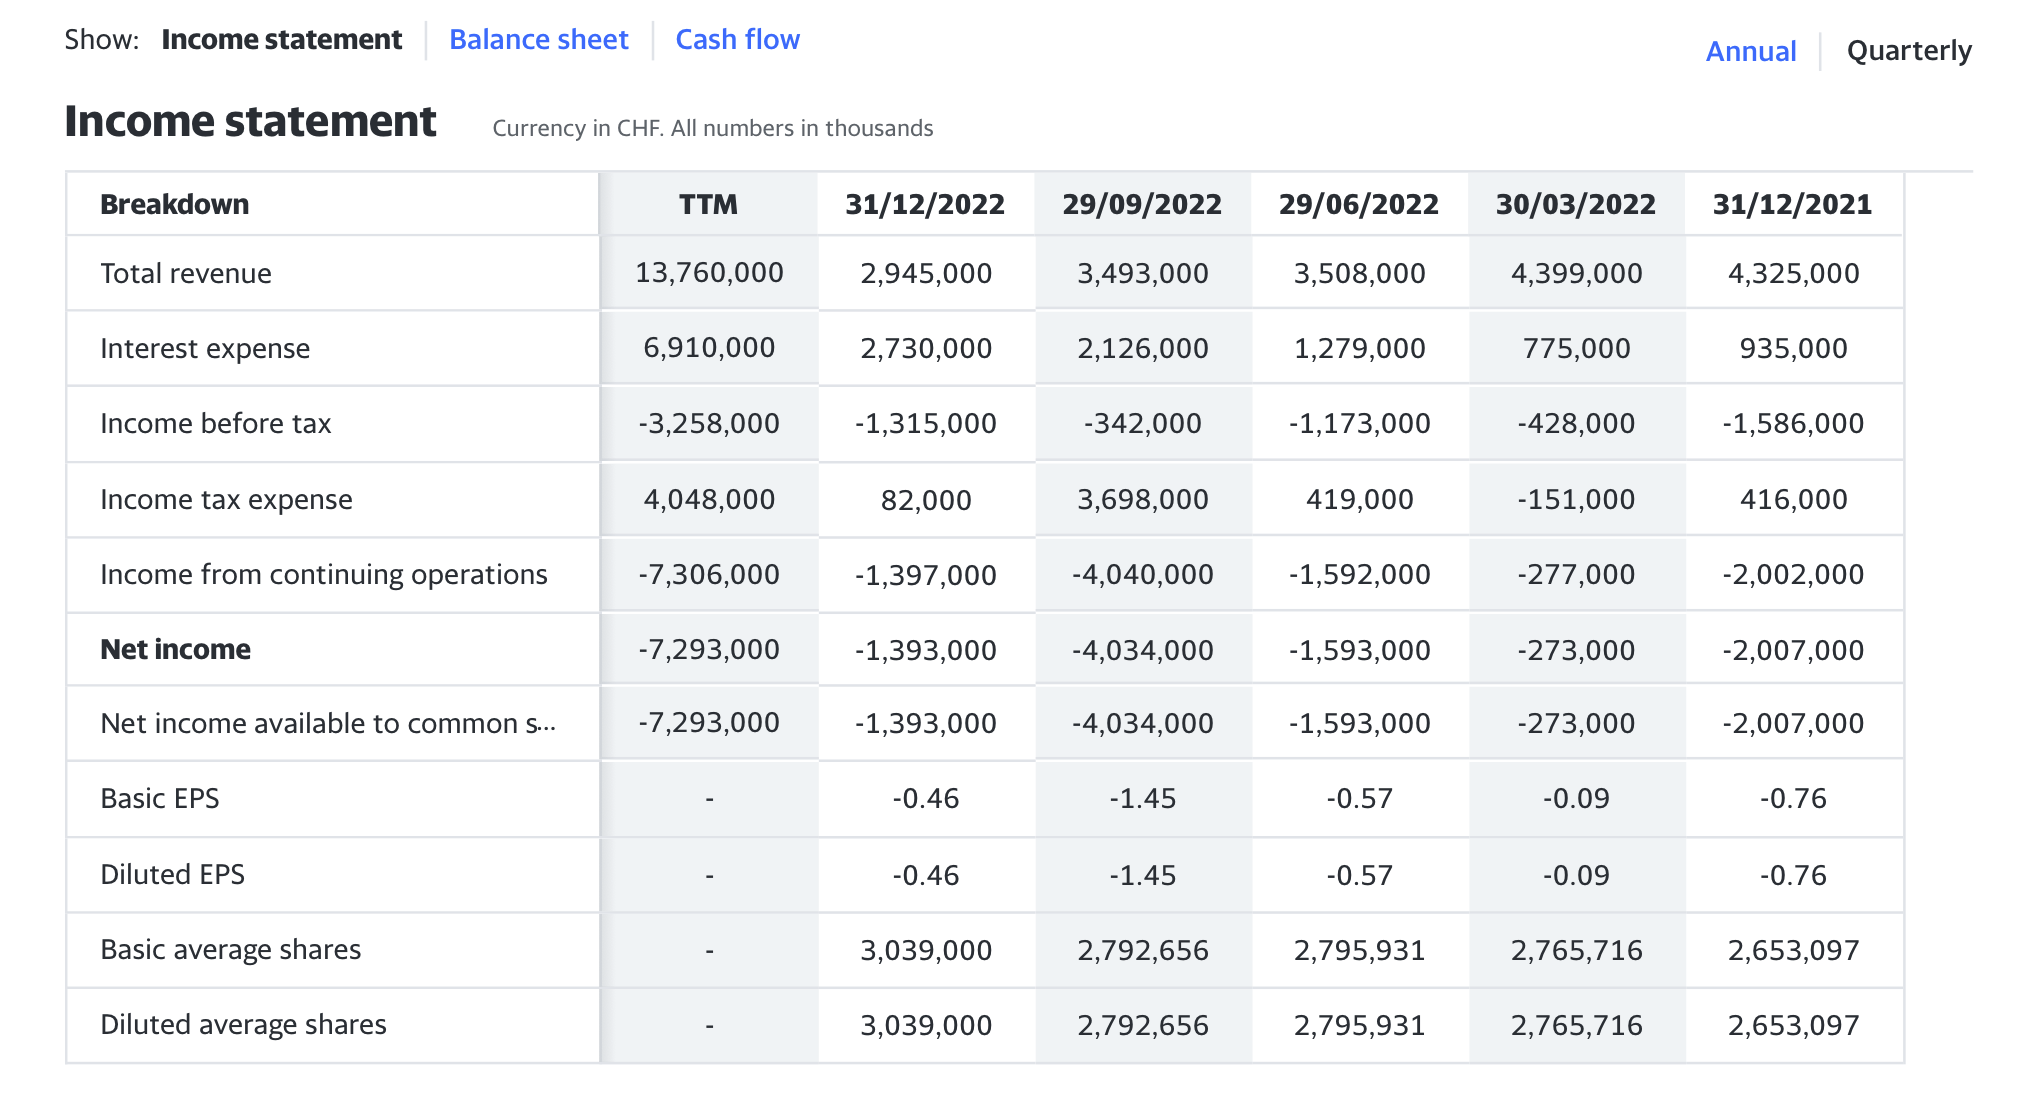

The present income statement of Credit Suisse (CS) showcases a detailed analysis of the company's financial performance over a specified period of time. The document provides a comprehensive breakdown of the company's revenue, costs, and profits, enabling stakeholders to gain a thorough understanding of the company's financial position. The statement is structured into several segments, including Total Revenue, Cost of Revenue, Gross Profit, Operating Expenses, Operating Income or Loss, and Net Income. These segments provide insight into the various sources of revenue, the costs associated with generating that revenue, and the company's overall profitability. This information is critical for investors, analysts, and decision-makers to make informed judgments about the company's financial health and future prospects.

In [2]:
symbol = "CS"
api_key = "YOUR_API_KEY"
url = f"https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol={symbol}&apikey={api_key}"

response = requests.get(url)
data = response.json()
price = data["Global Quote"]["05. price"]
print(price)

0.8773


In [3]:
df = pd.DataFrame.from_dict(data, orient='columns')

print(df)

                       Global Quote
01. symbol                       CS
02. open                     0.8748
03. high                     0.8964
04. low                      0.8700
05. price                    0.8773
06. volume                 32089531
07. latest trading day   2023-03-29
08. previous close           0.8531
09. change                   0.0242
10. change percent          2.8367%


In [4]:
ticker = "CS"
api_key = "6eb8c70712a889b4f7efbf8d8ad902d4"

In [5]:
stock = yf.Ticker(ticker)
stock_history = stock.history(period="1y")

In [6]:
stock_history.reset_index(inplace=True)

In [7]:
income_statement_annually = fa.income_statement(ticker, api_key, period="annual")

In [8]:
income_statement_annually

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
reportedCurrency,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,...,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF
cik,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,...,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510
fillingDate,2022-12-31,2021-12-31,2020-12-31,2019-12-31,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,2013-12-31,...,2009-12-31,2008-12-31,2007-12-31,2006-12-31,2005-12-31,2004-12-31,2003-12-31,2002-12-31,2001-12-31,2000-12-31
acceptedDate,2022-12-30 19:00:00,2021-12-30 19:00:00,2020-12-30 19:00:00,2019-12-30 19:00:00,2018-12-30 19:00:00,2017-12-30 19:00:00,2016-12-30 19:00:00,2015-12-30 19:00:00,2014-12-30 19:00:00,2013-12-30 19:00:00,...,2009-12-30 19:00:00,2008-12-30 19:00:00,2007-12-30 19:00:00,2006-12-30 19:00:00,2005-12-30 19:00:00,2004-12-30 19:00:00,2003-12-30 19:00:00,2002-12-30 19:00:00,2001-12-30 19:00:00,2000-12-30 19:00:00
calendarYear,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
period,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
revenue,14537000000,15987000000,20635000000,20471000000,19297000000,19242000000,17741000000,21766000000,24037000000,23837000000,...,31676000000,9750000000,36868000000,36185000000,60774282000,53940686800,51474706400,70656113320,75664155120,66761973500
costOfRevenue,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
grossProfit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
grossProfitRatio,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
income_statement_annually.to_csv('credit_suisse_come_statement.csv', index=True)

In [10]:
credit_suisse_income_statement = pd.read_csv('credit_suisse_come_statement.csv')

In [11]:
credit_suisse_income_statement.columns.values[0] = "breakdown"

In [12]:
credit_suisse_income_statement

,breakdown,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,reportedCurrency,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,...,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF
1,cik,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,...,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510
2,fillingDate,2022-12-31,2021-12-31,2020-12-31,2019-12-31,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,...,2009-12-31,2008-12-31,2007-12-31,2006-12-31,2005-12-31,2004-12-31,2003-12-31,2002-12-31,2001-12-31,2000-12-31
3,acceptedDate,2022-12-30 19:00:00,2021-12-30 19:00:00,2020-12-30 19:00:00,2019-12-30 19:00:00,2018-12-30 19:00:00,2017-12-30 19:00:00,2016-12-30 19:00:00,2015-12-30 19:00:00,2014-12-30 19:00:00,...,2009-12-30 19:00:00,2008-12-30 19:00:00,2007-12-30 19:00:00,2006-12-30 19:00:00,2005-12-30 19:00:00,2004-12-30 19:00:00,2003-12-30 19:00:00,2002-12-30 19:00:00,2001-12-30 19:00:00,2000-12-30 19:00:00
4,calendarYear,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
5,period,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
6,revenue,14537000000,15987000000,20635000000,20471000000,19297000000,19242000000,17741000000,21766000000,24037000000,...,31676000000,9750000000,36868000000,36185000000,60774282000,53940686800,51474706400,70656113320,75664155120,66761973500
7,costOfRevenue,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,grossProfit,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,grossProfitRatio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 23 YEAR REVENUE CHART OF CREDIT SUISSE 

In [13]:
data = credit_suisse_income_statement.loc[6]
data

breakdown        revenue
2022         14537000000
2021         15987000000
2020         20635000000
2019         20471000000
2018         19297000000
2017         19242000000
2016         17741000000
2015         21766000000
2014         24037000000
2013         23837000000
2012         21583000000
2011         24132000000
2010         29205000000
2009         31676000000
2008          9750000000
2007         36868000000
2006         36185000000
2005         60774282000
2004         53940686800
2003         51474706400
2002         70656113320
2001         75664155120
2000         66761973500
Name: 6, dtype: object

In [14]:
year = []
revenue = []
for k, v in data.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        revenue.append(int(v))
year = pd.DataFrame(year)
revenue = pd.DataFrame(revenue)

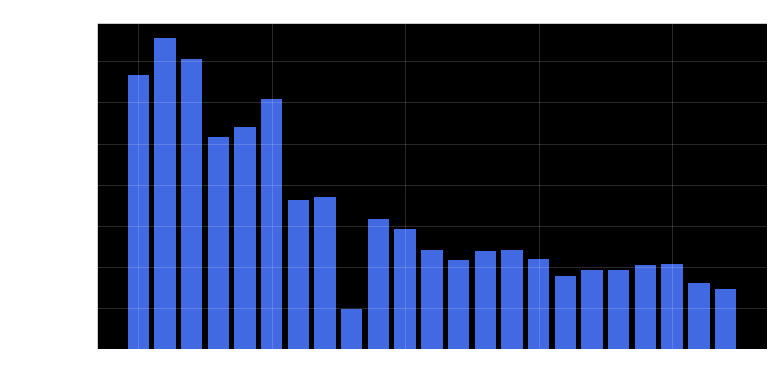

In [15]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(year[0],revenue[0], color="royalblue")
plt.ticklabel_format(axis='y', style='plain')
plt.title("Credit Suisse Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Revenue (CHF)")
ax.grid(color='white', alpha=0.20)
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime

In [17]:
# Fit the linear regression model
reg = LinearRegression().fit(year, revenue)
reg

LinearRegression()

In [18]:
revenue.values.reshape(-1,1)

array([[14537000000],
       [15987000000],
       [20635000000],
       [20471000000],
       [19297000000],
       [19242000000],
       [17741000000],
       [21766000000],
       [24037000000],
       [23837000000],
       [21583000000],
       [24132000000],
       [29205000000],
       [31676000000],
       [ 9750000000],
       [36868000000],
       [36185000000],
       [60774282000],
       [53940686800],
       [51474706400],
       [70656113320],
       [75664155120],
       [66761973500]])

In [19]:
# Make predictions
predictions = reg.predict(year)

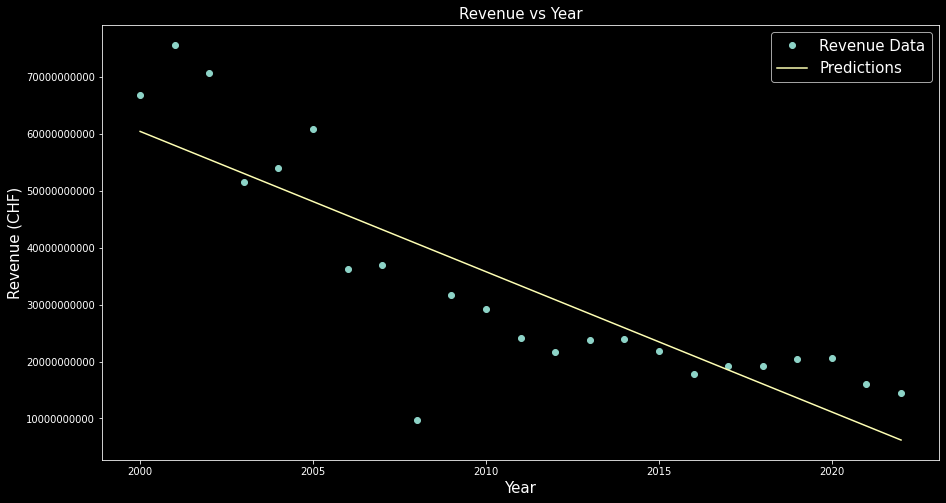

In [20]:
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
plt.plot(year, revenue, 'o', label='Revenue Data')
plt.plot(year, predictions, label='Predictions')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Revenue (CHF)', fontsize=15)
plt.title('Revenue vs Year', fontsize=15)
plt.legend(fontsize=15)
plt.ticklabel_format(axis='y', style='plain')
plt.show()

#### 10 YEAR REVENUE CHART OF CREDIT SUISSE

In [21]:
data = credit_suisse_income_statement.loc[6]
data = data.head(10)
data

breakdown        revenue
2022         14537000000
2021         15987000000
2020         20635000000
2019         20471000000
2018         19297000000
2017         19242000000
2016         17741000000
2015         21766000000
2014         24037000000
Name: 6, dtype: object

In [22]:
year = []
revenue = []
for k, v in data.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        revenue.append(int(v))
year = pd.DataFrame(year)
revenue = pd.DataFrame(revenue)

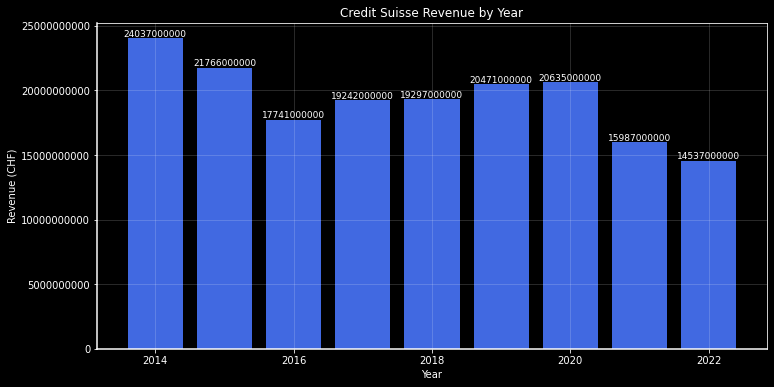

In [23]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(year[0],revenue[0], color="royalblue")
plt.ticklabel_format(axis='y', style='plain')
plt.title("Credit Suisse Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Revenue (CHF)")
for i in range(len(year)):
    plt.text(year.iloc[i], revenue.iloc[i], str(revenue.iloc[i][0]), ha='center', va='bottom', fontsize=9)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
ax.grid(color='white', alpha=0.20)
plt.show()

In [24]:
data2 = credit_suisse_income_statement.loc[28]
data2

breakdown      netIncome
2022         -7293000000
2021         -1650000000
2020          2669000000
2019          3419000000
2018          2024000000
2017          -983000000
2016         -2710000000
2015         -2944000000
2014          1875000000
2013          2326000000
2012          1349000000
2011          1953000000
2010          5098000000
2009          6724000000
2008         -8218000000
2007          7760000000
2006         11327000000
2005          5863284000
2004          5620507200
2003           770757520
2002         -3311918920
2001          1592684580
2000          4495538000
Name: 28, dtype: object

In [25]:
year = []
net_income = []
for k, v in data2.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        net_income.append(int(v))
year = pd.DataFrame(year)
revenue = pd.DataFrame(revenue)

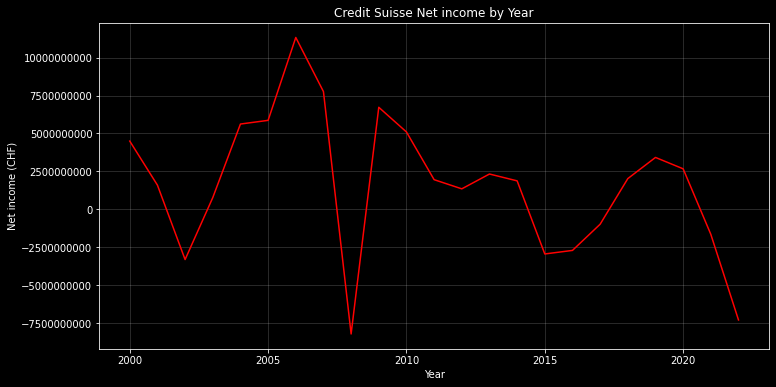

In [26]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(year, net_income, color="red")
plt.ticklabel_format(axis='y', style='plain')
plt.title("Credit Suisse Net income by Year")
plt.xlabel("Year")
plt.ylabel("Net income (CHF)")
ax.grid(color='white', alpha=0.20)

In [27]:
year = year.values.flatten()

In [28]:
year.ndim

1

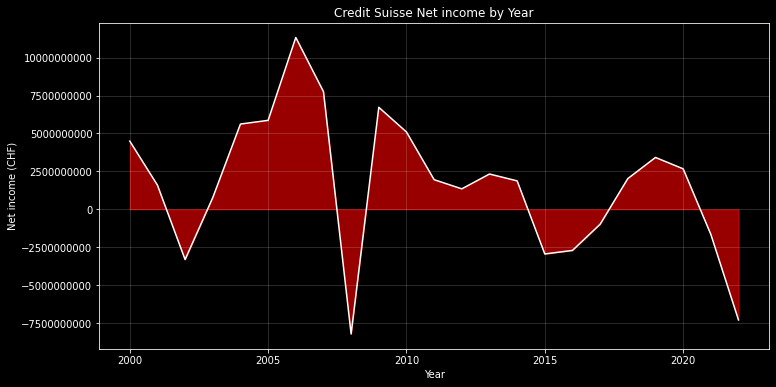

In [29]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(year, net_income, color="white")
plt.fill_between(year, net_income, color="red", alpha=0.6)
plt.ticklabel_format(axis='y', style='plain')
plt.title("Credit Suisse Net income by Year")
plt.xlabel("Year")
plt.ylabel("Net income (CHF)")
ax.grid(color='white', alpha=0.20)

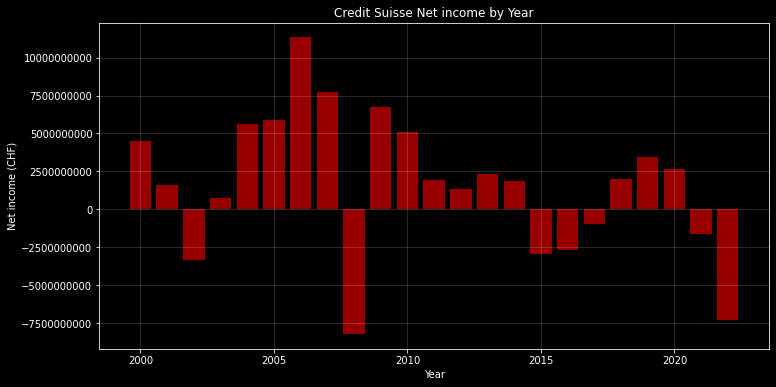

In [30]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(year, net_income, color="red", alpha=0.6)
plt.ticklabel_format(axis='y', style='plain')
plt.title("Credit Suisse Net income by Year")
plt.xlabel("Year")
plt.ylabel("Net income (CHF)")
ax.grid(color='white', alpha=0.20)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime

In [32]:
cs = yf.Ticker("CS")
data = cs.history(period="10y")

In [33]:
data['Date_ordinal'] = [datetime.toordinal(d) for d in data.index]
x = data['Date_ordinal'].values.reshape(-1, 1)
y = data['Close']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.2, 
                                                    random_state=0)

In [35]:
# Create a linear regression model
model = LinearRegression()

In [36]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [37]:
# Predict the values
y_pred = model.predict(X_test)

In [38]:
y_pred[:5]

array([16.43296257, 13.67160453, 18.14536317, 15.75607123,  7.09993101])

In [39]:
X_train

array([[735424],
       [736296],
       [735995],
       ...,
       [736065],
       [736167],
       [737354]])

In [40]:
# Convert ordinal value back to date
X_test = [datetime.fromordinal(int(d)) for d in X_test.flatten()]

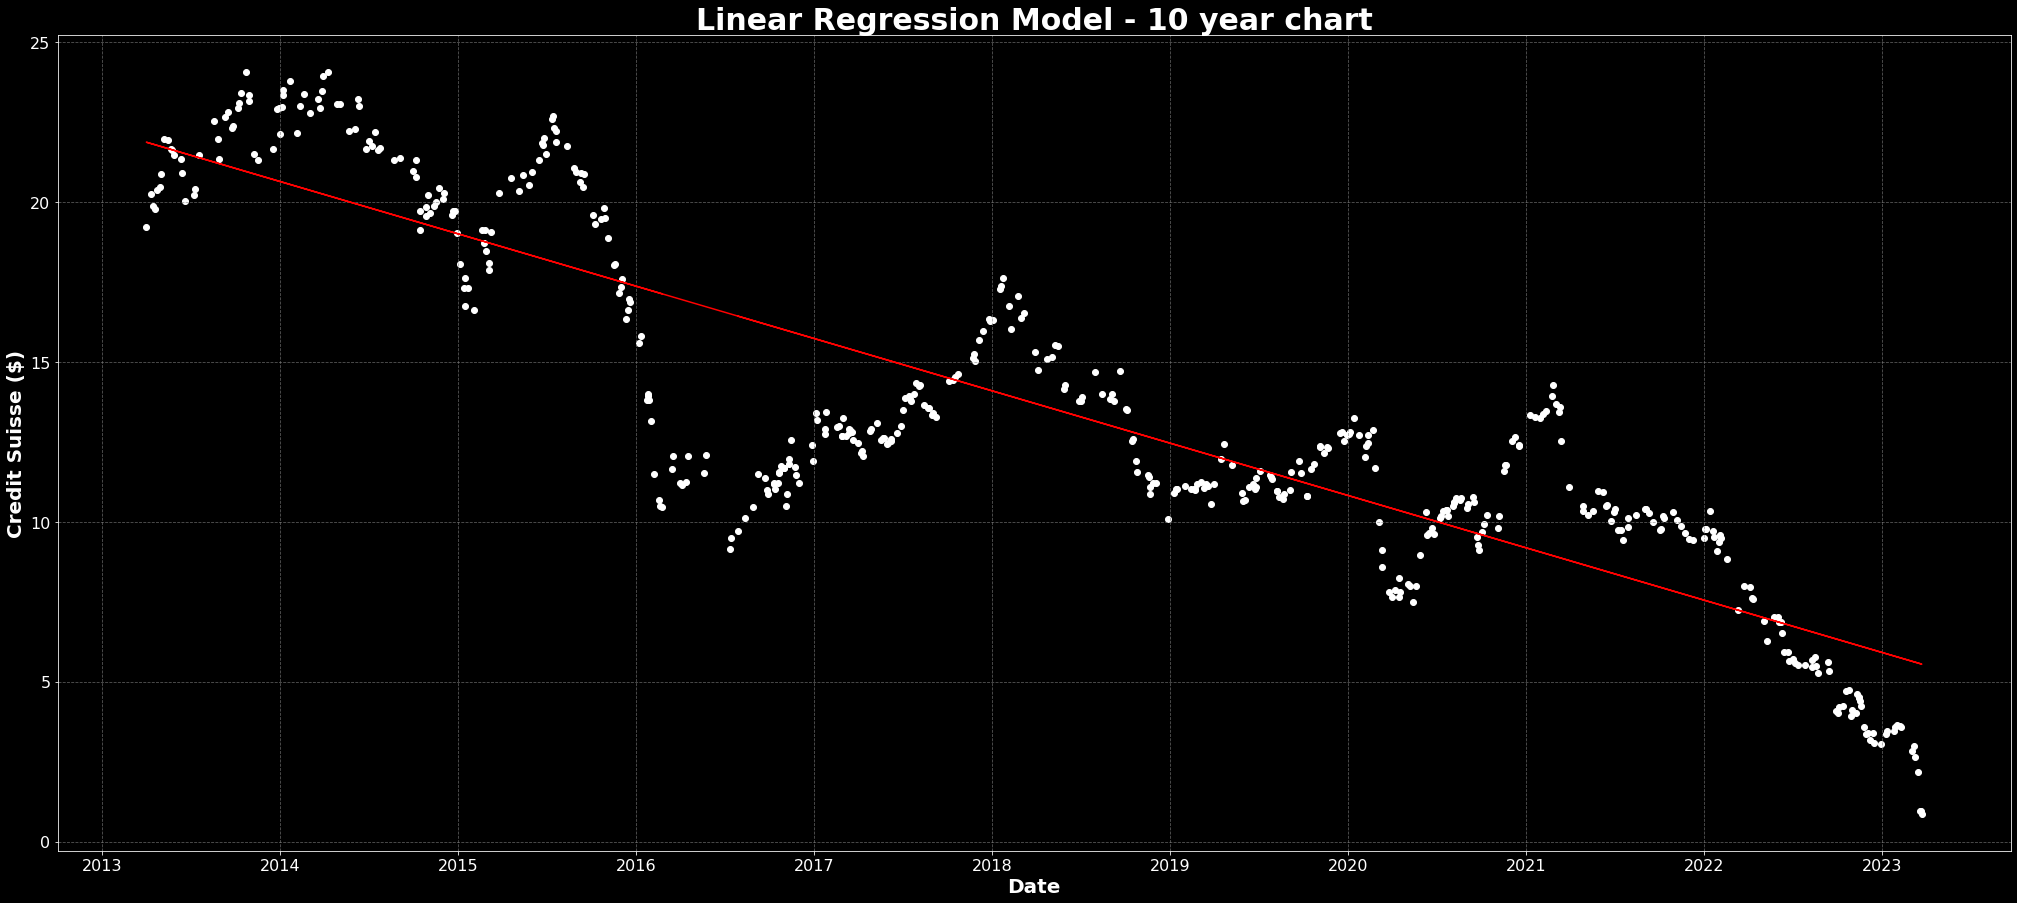

In [41]:
plt.style.use('dark_background')
plt.figure(figsize=(35,15))
plt.scatter(x=X_test, y=y_test, label='Actual', color='white')
plt.plot(X_test, y_pred, label='Predicted', color='red')
plt.title('Linear Regression Model - 10 year chart', fontsize=30, color="White", fontweight='bold')
plt.xlabel("Date", fontsize=20, fontweight='bold')
plt.ylabel("Credit Suisse ($)", fontsize=20, fontweight='bold')
plt.tick_params(axis="both", labelsize=16)
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.show()